#### predict notebook
* load test image

### Set dependancies

In [1]:
%reset -f

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

tf.keras.backend.clear_session()

import numpy as np
from numpy.random import randint

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

import matplotlib.pyplot as plt

import pandas

import os

import cv2
import glob

print(tf.__version__)

2.2.0


### Load model

In [2]:
import os
# Save the entire model as a SavedModel.
os.chdir("C:/Users/Junior/anaconda_projects/image_classification/aisolvers/")
# model = tf.saved_model.load('saved_model/vetmodel/')
model = tf.keras.models.load_model('saved_model/vetmodel/', compile=False)

In [3]:
# probability_model = Sequential([model, tf.keras.layers.Softmax()])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 9)                 20508713  
_________________________________________________________________
softmax_1 (Softmax)          (None, 9)                 0         
Total params: 20,508,713
Trainable params: 20,508,713
Non-trainable params: 0
_________________________________________________________________


In [4]:
class_names = ['Unknown', 'Mycoses', 'Parasites', 'Allergies', 'Autoimmune', 'Tumors', 'Hormonal', 'Viral', 'Bacterial']

In [5]:
IMG_HEIGHT=200
IMG_WIDTH=200

In [6]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(9))
    plt.yticks([])
    thisplot = plt.bar(range(9), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [7]:
def im2npa(imagedir, subdirs, show):
# create numpy array from directory of images
# inputs:
# imagedir - directory with the images
# subdirs - list of subdirs (classes)
# show - if=1, plot files and file names
# outputs:
# data - numpy array variable with all images as tensor
    data = []
    for i in range(len(subdirs)):
        pathis=os.path.join(imagedir, subdirs[i],"*.png")
        files = glob.glob(pathis)
        for myFile in files:
            image = cv2.imread (myFile, cv2.IMREAD_UNCHANGED)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMG_HEIGHT,IMG_WIDTH))
            data.append (image)
            if show==1:
                print(myFile)
                imgplot = plt.imshow(image)
                plt.show()
    
    data=np.asarray(data)
    print('Data shape:', data.shape)
    return data

### Set variables


### Make predictions

With the model trained, you can use it to make predictions about some images.
The model's linear outputs, [logits](https://developers.google.com/machine-learning/glossary#logits). Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [8]:
# x_valid=im2npa('./data/random/', ['z'],0)
x_valid=im2npa('./data/train/', ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],0)

Data shape: (714, 200, 200, 3)


In [9]:
valid_labels=np.zeros((len(x_valid),), dtype=int)

In [10]:
# predictions = probability_model.predict(x_valid)
predictions = model.predict(x_valid)

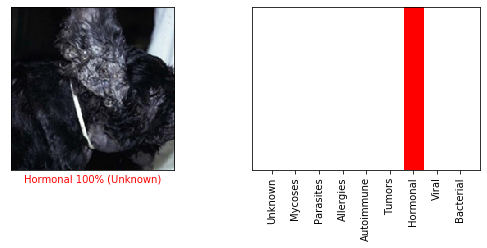

,Class,Prediction
0,Unknown,0.0
1,Mycoses,0.0
2,Parasites,0.0
3,Allergies,0.0
4,Autoimmune,0.0
5,Tumors,0.0
6,Hormonal,1.0
7,Viral,0.0
8,Bacterial,0.0


In [11]:
i = randint(0, len(x_valid)-1)
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], valid_labels, x_valid)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  valid_labels)
_ = plt.xticks(range(9), class_names, rotation=90)
plt.show()

import pandas
d = {'Class': class_names, 'Prediction': predictions[i]}
pandas.DataFrame(data=d).round(3)

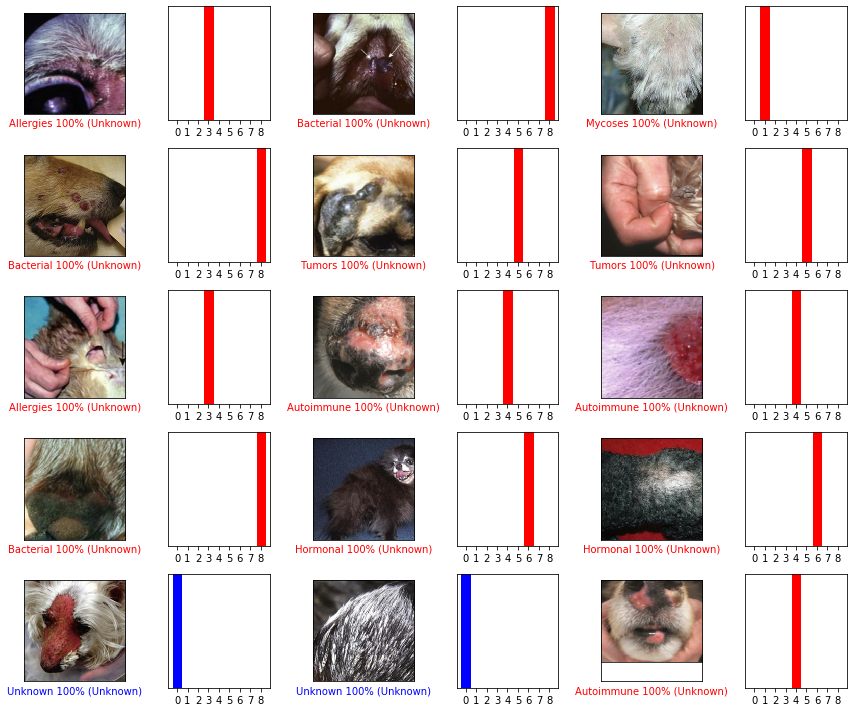

In [64]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
values=randint(0, len(x_valid)-1,num_images)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(values[i], predictions[values[i]], valid_labels, x_valid)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(values[i], predictions[values[i]], valid_labels)
plt.tight_layout()
plt.show()

### Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [65]:
import tkinter.filedialog

myFile=tkinter.filedialog.askopenfilename()

In [54]:
# Grab an image from the test dataset.
# img = test_images[1]


image = cv2.imread (myFile, cv2.IMREAD_UNCHANGED)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (200,200))
print(image.shape)

(200, 200, 3)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [55]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(image,0))

print(img.shape)

(1, 200, 200, 3)


Now predict the correct label for this image:

In [56]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[0.000 0.000 1.000 0.000 0.000 0.000 0.000 0.000 0.000]]
